# <center> Prédiction d'une Action dans Python </center>
---
### <center> Cas de la Bourse CAC 40 </center>
---
Le CAC 40 est le principal indice boursier de la **Bourse de Paris**. C'est un indice flottant pondéré en fonction de la capitalisation boursière qui reflète la performance des 40 actions les plus importantes et les plus activement négociées cotées sur Euronext Paris.
 
 ***Source documentation:*** https://fr.wikipedia.org/wiki/CAC_40
 
 **Objectifs** 
 * Analyser l'historique du Top entreprise en terme de capitalisation boursière du CAC40
 * Prédire le prix de l'action 



**Processus**
*   Extraction des données de CAC40 à partir de wikipédia et Yahoo Finance
*   Récupération des Tops entreprises en matière de capitalisation boursières dans chaque secteur d'activité:Pour voir l'impaction sur le prix de d'action sur le cas d'études
*   Traitement de données et Features engineering
* Modélisation et Evaluation des modèles

.

Packages

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

import pandas as pd
import numpy as np

### Extraction des données

.

*  Récupération des Tickers à partir de Wikipedia

In [6]:
cac40 = pd.read_html('https://en.wikipedia.org/wiki/CAC_40')[4]
tickers = cac40['Ticker'].to_list()
cac40.head(5)

,Company,Sector,GICS Sub-Industry,Ticker
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA
1,Airbus,Industrials,Aerospace & Defense,AIR.PA
2,Alstom,Industrials,Rail Transport,ALO.PA
3,ArcelorMittal,Basic Materials,Steel,MT.AS
4,AXA,Financial Services,Life & Health Insurance,CS.PA


In [7]:
cac40['Ticker'].unique()

array(['AI.PA', 'AIR.PA', 'ALO.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA',
       'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'EDEN.PA',
       'ENGI.PA', 'EL.PA', 'ERF.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA',
       'MC.PA', 'ML.PA', 'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA',
       'SGO.PA', 'SAN.PA', 'SU.PA', 'GLE.PA', 'STLAP.PA', 'STMPA.PA',
       'TEP.PA', 'HO.PA', 'TTE.PA', 'URW.PA', 'VIE.PA', 'DG.PA', 'WLN.PA'],
      dtype=object)

.

* A partir de *yahooquery* nous allons récupérer les métadata de chaque ticker

In [8]:
from yahooquery import Ticker

cac40_tickers = tickers

myDict = Ticker(" ".join(cac40_tickers)).price
myDict

{'AI.PA': {'maxAge': 1,
  'regularMarketChangePercent': 0.022004109,
  'regularMarketChange': 4.080002,
  'regularMarketTime': '2024-02-23 17:37:19',
  'priceHint': 2,
  'regularMarketPrice': 189.5,
  'regularMarketDayHigh': 190.18,
  'regularMarketDayLow': 186.0,
  'regularMarketVolume': 684869,
  'regularMarketPreviousClose': 185.42,
  'regularMarketSource': 'DELAYED',
  'regularMarketOpen': 186.0,
  'exchange': 'PAR',
  'exchangeName': 'Paris',
  'exchangeDataDelayedBy': 15,
  'marketState': 'CLOSED',
  'quoteType': 'EQUITY',
  'symbol': 'AI.PA',
  'underlyingSymbol': None,
  'shortName': 'AIR LIQUIDE',
  'longName': "L'Air Liquide S.A.",
  'currency': 'EUR',
  'quoteSourceName': 'Delayed Quote',
  'currencySymbol': '€',
  'fromCurrency': None,
  'toCurrency': None,
  'lastMarket': None,
  'marketCap': 99139198976},
 'AIR.PA': {'maxAge': 1,
  'regularMarketChangePercent': 0.00461711,
  'regularMarketChange': 0.68000793,
  'regularMarketTime': '2024-02-23 17:35:25',
  'priceHint': 2,

.

 * Nous allons juste récupérer la capitalisation en temps réel de chaque Entretripe représenté par la clé *marketCap* à notre dataframe *cac40*

In [10]:

cac40['marketCap'] = cac40['Ticker'].map(lambda x: myDict[x]['marketCap']/1000000000)
cac40.head(10)

,Company,Sector,GICS Sub-Industry,Ticker,marketCap
0,Air Liquide,Basic Materials,Industrial Gases,AI.PA,99.139199
1,Airbus,Industrials,Aerospace & Defense,AIR.PA,116.505928
2,Alstom,Industrials,Rail Transport,ALO.PA,4.544243
3,ArcelorMittal,Basic Materials,Steel,MT.AS,19.800676
4,AXA,Financial Services,Life & Health Insurance,CS.PA,72.745730
5,BNP Paribas,Financial Services,Diversified Banks,BNP.PA,64.706400
6,Bouygues,Industrials,Construction & Engineering,EN.PA,13.165432
7,Capgemini,Technology,IT Consulting & Other Services,CAP.PA,37.643751
8,Carrefour,Consumer Defensive,Hypermarkets & Super Centers,CA.PA,11.345737
9,Crédit Agricole,Financial Services,Regional Banks,ACA.PA,38.092763


.

il s'agit bien des données en temps réel: cas de BNP Paribas

<img src=Cap.png>

 .

 *  Top Entreprises dans chaque secteur

In [11]:
tops_tickers = cac40.groupby('Sector').apply(lambda x: x.nlargest(1, 'marketCap')[['Sector','Ticker', 'marketCap']])
tops_tickers.reset_index(drop=True, inplace=True)
tops_tickers.sort_values(by = 'marketCap', ascending = False)

,Sector,Ticker,marketCap
2,Consumer Cyclical,MC.PA,424.658108
3,Consumer Defensive,OR.PA,241.241489
4,Energy,TTE.PA,139.298341
7,Industrials,SU.PA,117.134909
6,Healthcare,SAN.PA,112.008315
0,Basic Materials,AI.PA,99.139199
5,Financial Services,CS.PA,72.745730
9,Technology,DSY.PA,56.890991
10,Utilities,ENGI.PA,35.928236
1,Communication Services,ORA.PA,28.632435


In [12]:
cac40[cac40['Ticker']=='MC.PA']

,Company,Sector,GICS Sub-Industry,Ticker,marketCap
20,LVMH,Consumer Cyclical,"Apparel, Accessories & Luxury Goods",MC.PA,424.658108


**NB**: On note donc ***MC.PA*** correspondant à l'entreprise **LVMH**, est l'entreprise la côté en capitalisation de toutes. On va donc effectué notre étude sur le ***MC.PA***

 .

 *  Télechargement des données quotidienne des tops par secteur du CAC40 de Yahoo Finance sur la périodes de **2000-01-01** à nos jours

In [13]:

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

data = yf.download(tops_tickers.Ticker.to_list(), start='2000-01-01')
data

[*********************100%%**********************]  11 of 11 completed


Price        Adj Close                                               \
Ticker           AI.PA      CS.PA     DSY.PA    ENGI.PA       MC.PA   
Date                                                                  
2000-01-03   16.056761   4.985425   5.639937   9.422720   56.547314   
2000-01-04   15.344180   4.802137   5.084237   9.257718   51.198250   
2000-01-05   15.201662   4.728823   4.690271   9.128071   49.466152   
2000-01-06   16.294281   4.692164   4.748329   9.251823   48.905777   
2000-01-07   16.094761   4.838796   4.976416   9.075036   48.905777   
...                ...        ...        ...        ...         ...   
2024-02-19  171.679993  31.010000  43.540001  14.320000  821.900024   
2024-02-20  185.860001  31.165001  43.099998  14.446000  820.200012   
2024-02-21  185.399994  31.174999  42.744999  14.530000  821.599976   
2024-02-22  185.419998  32.060001  43.294998  14.754000  840.400024   
2024-02-23  189.500000  32.299999  43.330002  14.840000  850.099976   

Price                                                                ...  \
Ticker           OR.PA     ORA.PA     SAN.PA       SU.PA     TTE.PA  ...   
Date                                                                 ...   
2000-01-03   53.751457  35.559238  18.333029   19.700466   9.924100  ...   
2000-01-04   49.936390  33.659126  17.192915   19.002228   9.563219  ...   
2000-01-05   48.233234  31.894739  16.467802   18.204227   9.322637  ...   
2000-01-06   50.072632  31.487568  17.101707   19.126905   9.051979  ...   
2000-01-07   51.094536  32.437630  18.013796   19.476032   9.097090  ...   
...                ...        ...        ...         ...        ...  ...   
2024-02-19  441.299988  10.846000  86.220001  203.000000  59.689999  ...   
2024-02-20  443.600006  10.904000  87.129997  201.149994  58.599998  ...   
2024-02-21  444.549988  10.846000  87.370003  202.500000  58.919998  ...   
2024-02-22  451.149994  10.772000  88.739998  207.550003  59.130001  ...   
2024-02-23  450.200012  10.768000  89.709999  209.800003  59.660000  ...   

Price         Volume                                                        \
Ticker         CS.PA   DSY.PA  ENGI.PA    MC.PA    OR.PA   ORA.PA   SAN.PA   
Date                                                                         
2000-01-03  12220955  1546980  2602000   615855  1188070  1551490   710248   
2000-01-04  25162210  2441040  2560000  1691700  1908790  1988788  1102290   
2000-01-05  20716144  2428580  3970500  1563735  1399870  2593952  1457955   
2000-01-06  10870492  2379390  3477000  1641215   980000  2847297  1054723   
2000-01-07  15711483  2063800  3451500  1360530  1082640  1593258  1688898   
...              ...      ...      ...      ...      ...      ...      ...   
2024-02-19   1348817   690475  3252156   141478   129207  3902084   747978   
2024-02-20   2351697   906898  5307826   199095   169958  4513463  2181693   
2024-02-21   3000300   693421  4965970   209929   195482  3974959  1287552   
2024-02-22   4691033  1919624  9785162   392244   317754  5447606  1634926   
2024-02-23   3300491   925416  7025008   329686   334870  6247053  1242118   

Price                                    
Ticker        SU.PA    TTE.PA    URW.PA  
Date                                     
2000-01-03   961380   4044084       NaN  
2000-01-04   908412   6565240       NaN  
2000-01-05   960046   8296864       NaN  
2000-01-06  1052494   9581504       NaN  
2000-01-07  2573564  16985068       NaN  
...             ...       ...       ...  
2024-02-19   485225   2312753  216698.0  
2024-02-20   531166   3442884  242516.0  
2024-02-21   710651   3222466  239203.0  
2024-02-22  1117782   3543583  417491.0  
2024-02-23   872582   3264682  328825.0  

[6209 rows x 66 columns]

.

Il s'agit d'une dataFrame MutliIndex. 
On va récupérer le prix de clôture de chaque tickers **('Adj Close')**

In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.columns

MultiIndex([('Adj Close',   'AI.PA'),
            ('Adj Close',   'CS.PA'),
            ('Adj Close',  'DSY.PA'),
            ('Adj Close', 'ENGI.PA'),
            ('Adj Close',   'MC.PA'),
            ('Adj Close',   'OR.PA'),
            ('Adj Close',  'ORA.PA'),
            ('Adj Close',  'SAN.PA'),
            ('Adj Close',   'SU.PA'),
            ('Adj Close',  'TTE.PA'),
            ('Adj Close',  'URW.PA'),
            (    'Close',   'AI.PA'),
            (    'Close',   'CS.PA'),
            (    'Close',  'DSY.PA'),
            (    'Close', 'ENGI.PA'),
            (    'Close',   'MC.PA'),
            (    'Close',   'OR.PA'),
            (    'Close',  'ORA.PA'),
            (    'Close',  'SAN.PA'),
            (    'Close',   'SU.PA'),
            (    'Close',  'TTE.PA'),
            (    'Close',  'URW.PA'),
            (     'High',   'AI.PA'),
            (     'High',   'CS.PA'),
            (     'High',  'DSY.PA'),
            (     'High', 'ENGI.PA'),
            

In [25]:
top_adj_close = data['Adj Close']

.

In [29]:
top_adj_close

Ticker,AI.PA,CS.PA,DSY.PA,ENGI.PA,MC.PA,OR.PA,ORA.PA,SAN.PA,SU.PA,TTE.PA,URW.PA
Date,,,,,,,,,,,
2000-01-03,16.056761,4.985425,5.639937,9.422720,56.547314,53.751457,35.559238,18.333029,19.700466,9.924100,NaN
2000-01-04,15.344180,4.802137,5.084237,9.257718,51.198250,49.936390,33.659126,17.192915,19.002228,9.563219,NaN
2000-01-05,15.201662,4.728823,4.690271,9.128071,49.466152,48.233234,31.894739,16.467802,18.204227,9.322637,NaN
2000-01-06,16.294281,4.692164,4.748329,9.251823,48.905777,50.072632,31.487568,17.101707,19.126905,9.051979,NaN
2000-01-07,16.094761,4.838796,4.976416,9.075036,48.905777,51.094536,32.437630,18.013796,19.476032,9.097090,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,171.679993,31.010000,43.540001,14.320000,821.900024,441.299988,10.846000,86.220001,203.000000,59.689999,70.639999
2024-02-20,185.860001,31.165001,43.099998,14.446000,820.200012,443.600006,10.904000,87.129997,201.149994,58.599998,69.639999
2024-02-21,185.399994,31.174999,42.744999,14.530000,821.599976,444.549988,10.846000,87.370003,202.500000,58.919998,69.080002


### Traitement et Features engineering

Checking des Nan

In [37]:
top_adj_close.isna().sum()

Ticker
AI.PA         0
CS.PA         0
DSY.PA        0
ENGI.PA       0
MC.PA         0
OR.PA         0
ORA.PA        0
SAN.PA        0
SU.PA         0
TTE.PA        0
URW.PA     5987
dtype: int64

In [44]:
top_adj_close['URW.PA'].isna().describe()

count     6209
unique       2
top       True
freq      5987
Name: URW.PA, dtype: object

In [46]:
5987/6209

0.9642454501530037

Le URW.PA a beaucoup de valeurs manquantes à 96%, on va l'éliminer de l'étude

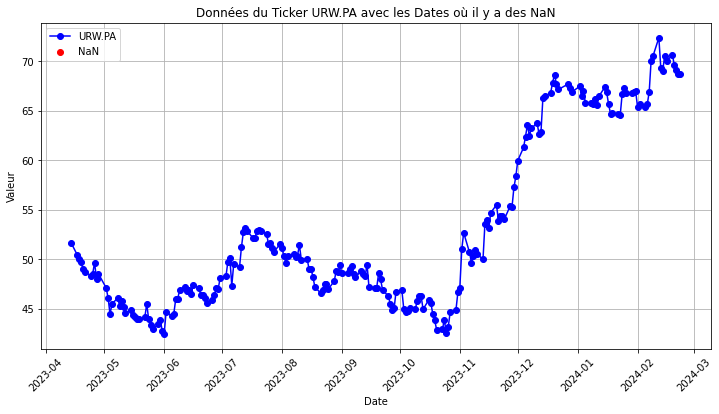

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index.values, df['URW.PA'].values, marker='o', linestyle='-', color='b', label='URW.PA')
plt.title('Données du Ticker URW.PA avec les Dates où il y a des NaN')
plt.xlabel('Date')
plt.ylabel('Valeur')
plt.xticks(rotation=45)
plt.scatter(nan_dates, [df['URW.PA'][date] for date in nan_dates], color='red', label='NaN')
plt.legend()
plt.grid(True)
plt.show()


.

* Variable Target

In [48]:
y =  top_adj_close['MC.PA'].shift(-5).pct_change(5)  

.

* Suppression des valeurs manquantes

In [49]:
y.dropna(inplace = True)
y

Date
2000-01-10    0.161919
2000-01-11    0.093137
2000-01-12    0.032864
2000-01-13   -0.019911
2000-01-14   -0.078723
                ...   
2024-02-19    0.034311
2024-02-20    0.036454
2024-02-21    0.034688
2024-02-22    0.011542
2024-02-23    0.000000
Name: MC.PA, Length: 6204, dtype: float64

.

On va ajouter quelques variables financières(des indicateurs) tels que: le MA15, MA100 ... le RSI15, RSI100 ... et le Bêta

* le **MA** fait allusion à ***'Moving Average'***(Moyenne Mobile) et le chiffre suivie au nombre de jours
* le **EMA** pour ***'Exponential Moving Average'***

* le **RSI** fait allusion à ***'Relative Strength Index'*** et le chiffre suivie au nombre de jours
* Le **Bêta**

Il existe d'ailleurs plusieurs indicateurs, on s'en tenir à ces trois. L'image ci-dessous montre un graphique qui illustre l'usage des indicateurs sur yahoo finance

<img src=ind.png>

.

* Calculons ces indicateurs

In [50]:
from sklearn.linear_model import LinearRegression

# Fonction pour calculer le bêta
def calculate_beta(stock_returns, market_returns):
    model = LinearRegression()
    model.fit(market_returns.values.reshape(-1, 1), stock_returns)
    return model.coef_[0]

In [59]:
import talib

# Liste des périodes
periodes = [10, 50, 200]

# Calcul du Moving Average (MA) pour chaque période
for periode in periodes:
    top_adj_close[f'MA_{periode}'] = top_adj_close['MC.PA'].rolling(window=periode).mean()
    
# Calcul de l'Exponential Moving Average (EMA) pour chaque période
for periode in periodes:
    top_adj_close[f'EMA_{periode}'] = talib.EMA(top_adj_close['MC.PA'].values, timeperiod=periode)

# Calcul du Relative Strength Index (RSI) pour chaque période
for periode in periodes:
    top_adj_close[f'RSI_{periode}'] = talib.RSI(top_adj_close['MC.PA'].values, timeperiod=periode)
    
# Calcul du bêta pour chaque période
for periode in periodes:
    stock_returns = top_adj_close['MC.PA'].pct_change().rolling(window=periode).mean()
    market_returns = top_adj_close['MC.PA'].pct_change().rolling(window=periode).mean()
    # Remplacer les NaN par la moyenne
    #market_returns = market_returns.fillna(market_returns.mean())
    #beta = calculate_beta(stock_returns, market_returns)
    #top_adj_close[f'Beta_{periode}'] = beta

In [57]:
top_adj_close

Ticker,AI.PA,CS.PA,DSY.PA,ENGI.PA,MC.PA,OR.PA,ORA.PA,SAN.PA,SU.PA,TTE.PA,URW.PA,MA_10,MA_50,MA_200,RSI_10,RSI_50,RSI_200,EMA_10,EMA_50,EMA_200
Date,,,,,,,,,,,,,,,,,,,,
2000-01-03,16.056761,4.985425,5.639937,9.422720,56.547314,53.751457,35.559238,18.333029,19.700466,9.924100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,15.344180,4.802137,5.084237,9.257718,51.198250,49.936390,33.659126,17.192915,19.002228,9.563219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,15.201662,4.728823,4.690271,9.128071,49.466152,48.233234,31.894739,16.467802,18.204227,9.322637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,16.294281,4.692164,4.748329,9.251823,48.905777,50.072632,31.487568,17.101707,19.126905,9.051979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,16.094761,4.838796,4.976416,9.075036,48.905777,51.094536,32.437630,18.013796,19.476032,9.097090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-19,171.679993,31.010000,43.540001,14.320000,821.900024,441.299988,10.846000,86.220001,203.000000,59.689999,70.639999,805.419995,735.436001,761.146925,74.603545,59.474950,52.640351,802.953237,746.256278,742.066694
2024-02-20,185.860001,31.165001,43.099998,14.446000,820.200012,443.600006,10.904000,87.129997,201.149994,58.599998,69.639999,809.489996,737.528002,760.844835,73.083293,59.249038,52.591248,806.089015,749.156032,742.844140
2024-02-21,185.399994,31.174999,42.744999,14.530000,821.599976,444.549988,10.846000,87.370003,202.500000,58.919998,69.080002,813.239996,739.178002,760.560658,73.575986,59.378695,52.627821,808.909189,751.996971,743.627780
